In [2]:
from keras.models import  Sequential
from keras import models, layers
import tensorflow as tf
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets
from keras.layers.core.activation import Activation
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [5]:

print(y_train.shape)
print(y_train)
#CONVERT Y INTO 1 DIMENSIONAL ARRAY

(50000, 1)
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [6]:
# Train = 50000 images
# Test = 10000 images
# Image SIze = 32 * 32 pixel
# RGB pattern = 3

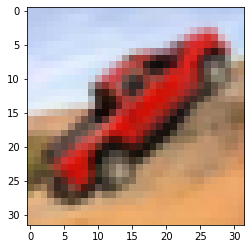

In [7]:
plt.imshow(X_train[140])

In [8]:
# CIFAR 10 = https://www.cs.toronto.edu/~kriz/cifar.html
# 10 CATEGORIES OF  IMAGE CATEGORIES LISTED

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
y_train = y_train.reshape(-1,)
print(y_train)
#CONVERT Y INTO 1 DIMENSIONAL ARRAY

[6 9 9 ... 9 1 1]


In [11]:
y_test = y_test.reshape(-1,)
print(y_test)
#CONVERT Y INTO 1 DIMENSIONAL ARRAY

[3 8 8 ... 5 1 7]


In [12]:
def plot_sample(X, y , index):
  plt.figure(figsize=(5,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

In [13]:
# #before data ormalization
# print(X_train)
# print(X_test)

In [14]:
# after normalization - WHy inorder to make it Gaussian in Nature
X_train = X_train / 255
X_test = X_test / 255
# print(X_train)
# print(X_test)

In [60]:
# Trying with CNN for Model evaluation in order to evaluate the mode performance
# Having CNN allows allows model to build COnvolutional networks with better feature extraction at COnvolution Layer
# Adding Relu acitvation to better compact the model
# maxppooling to  reduce the DATA dimension, shrinking the arrays to smaller arrays and then flatten the array to get the data for output

In [16]:
categoryCount = len(classes)
categoryCount

10

In [17]:
modelCNN = models.Sequential()

modelCNN.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3])))
modelCNN.add(layers.MaxPooling2D((2,2)))

modelCNN.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
modelCNN.add(layers.MaxPooling2D((2,2)))

modelCNN.add(layers.Flatten())
modelCNN.add(layers.Dense(64, activation='relu'))
modelCNN.add(layers.Dense(categoryCount,activation='softmax'))




In [18]:
modelCNN.compile(optimizer='adam', metrics=['accuracy'], loss="sparse_categorical_crossentropy")

In [21]:
modelCNN.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2870 - accuracy: 0.8978
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2701 - accuracy: 0.9021
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2537 - accuracy: 0.9065
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2387 - accuracy: 0.9149
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2244 - accuracy: 0.9182
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2112 - accuracy: 0.9236
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1959 - accuracy: 0.9302
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1909 - accuracy: 0.9306
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1756 - accuracy: 0.9354
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.171

In [31]:
modelCNN.evaluate(X_test, y_test)
#MODEL  ACCURACY ON TEST DATA IS 67, VERY LOW WITH USING CNN

313/313 [==============================] - 1s 3ms/step - loss: 1.9508 - accuracy: 0.6778


[1.9507946968078613, 0.6777999997138977]

In [26]:
y_pred = modelCNN.predict(X_test)

In [27]:
y_pred_Multiclass = [np.argmax(data) for data in y_pred]

In [41]:
#TEST DATA : comparing YTEST and YPRED TEST based on results to see what percentage of True Postives were returned from first 10 results(# RESULT 100 ACCURATE FOR FIRST 10 DATA)
print(y_test[:10])
print(y_pred_Multiclass[:10])

[3 8 8 0 6 6 1 6 3 1]
[3, 8, 8, 0, 6, 6, 1, 6, 3, 1]


In [28]:
#Classification Report TEST DATA
print(classification_report(y_test, y_pred_Multiclass))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1000
           1       0.81      0.77      0.79      1000
           2       0.60      0.54      0.57      1000
           3       0.47      0.48      0.48      1000
           4       0.64      0.59      0.62      1000
           5       0.55      0.64      0.59      1000
           6       0.77      0.73      0.75      1000
           7       0.71      0.74      0.72      1000
           8       0.79      0.79      0.79      1000
           9       0.75      0.78      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



In [29]:
y_predTrain = modelCNN.predict(X_train)
y_pred_MulticlassTrain = [np.argmax(data) for data in y_predTrain]

In [30]:
#Classification Report TRAIN DATA
print(classification_report(y_train, y_pred_MulticlassTrain))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      5000
           1       0.99      0.98      0.99      5000
           2       0.97      0.93      0.95      5000
           3       0.92      0.91      0.91      5000
           4       0.97      0.95      0.96      5000
           5       0.90      0.96      0.93      5000
           6       0.98      0.96      0.97      5000
           7       0.97      0.98      0.98      5000
           8       0.98      0.99      0.98      5000
           9       0.97      0.99      0.98      5000

    accuracy                           0.96     50000
   macro avg       0.96      0.96      0.96     50000
weighted avg       0.96      0.96      0.96     50000



In [45]:
#TRAIN DATA : comparing YTRAIN and YPRED TRAIN based on results to see what percentage of True Postives were returned from first 10 results(
    # RESULT 100 ACCURATE FOR FIRST 10 DATA)
print(y_train[:10])
print(y_pred_MulticlassTrain[:10])

[6 9 9 4 1 1 2 7 8 3]
[6, 9, 9, 4, 1, 1, 2, 7, 8, 3]


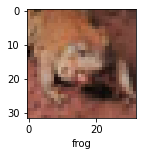

In [53]:
plot_sample(X_test,y_test,5)

In [47]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [55]:
# print(y_test[:10])
# [3 8 8 0 6 6 1 6 3 1]
# print(y_pred_Multiclass[:10])
# [3, 8, 8, 0, 6, 6, 1, 6, 3, 1]
classes[y_pred_Multiclass[5]]

#plot_sample(X_test,y_test,9) gave automobile as OUTPUT
#classes[y_pred_Multiclass[9]] gave automobile as OUTPUT

#plot_sample(X_test,y_test,5) gave frog as OUTPUT
#classes[y_pred_Multiclass[5]] gave frog as OUTPUT

'frog'

In [58]:
# CONFUSION MATRIX FOR TEST DATA - DATA BEST ALIGNED AT DIAGONALS
confusion_matrix(y_test,y_pred_Multiclass)

array([[719,  20,  70,  22,  22,  11,   6,  15,  74,  41],
       [ 29, 766,   8,  16,   7,  11,  11,   4,  35, 113],
       [ 57,  11, 542,  90,  89,  79,  63,  40,  18,  11],
       [ 24,   6,  55, 484,  63, 218,  51,  53,  21,  25],
       [ 32,   7,  63,  88, 595,  57,  46,  96,  11,   5],
       [  9,   3,  57, 148,  40, 637,  19,  61,  10,  16],
       [  6,   5,  48,  97,  48,  39, 728,  13,   8,   8],
       [ 22,   8,  28,  47,  55,  74,   8, 736,   6,  16],
       [ 71,  37,  18,  17,   8,  14,   7,   8, 788,  32],
       [ 35,  81,  14,  19,   6,  16,   5,  13,  28, 783]])

In [59]:
# CONFUSION MATRIX FOR TEST DATA - DATA BEST ALIGNED AT DIAGONALS
confusion_matrix(y_train,y_pred_MulticlassTrain)

array([[4856,    6,   32,   17,   17,    5,    2,    1,   41,   23],
       [   8, 4908,    3,    6,    2,    3,    2,    0,   13,   55],
       [  34,    0, 4669,   84,   60,   83,   27,   22,   12,    9],
       [  14,    4,   32, 4536,   27,  326,   26,   21,    6,    8],
       [  17,    1,   20,   64, 4726,   82,   25,   54,    7,    4],
       [   1,    0,   14,   96,   18, 4820,    2,   41,    3,    5],
       [  12,    3,   36,   87,   28,   26, 4797,    2,    3,    6],
       [   3,    1,    7,   14,    8,   35,    4, 4919,    1,    8],
       [  25,    3,    2,    8,    2,    3,    3,    1, 4938,   15],
       [   5,   14,    0,    3,    1,    2,    0,    4,    8, 4963]])

In [61]:
modelCNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1